In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.cluster import KMeans

#### An artificial data set consisting of 3000 points in 3 quite well-separated clusters.
- 3000 observations on 2 numeric variables 
- (named V1 and V2) giving the x and y coordinates of the points, respectively.

In [2]:
# Importing the dataset
data = pd.read_csv(r'D:\Python\Machine Learning\datasets\xclara.csv')

In [3]:
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


#### Getting the values and plotting it

In [4]:
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))
X
#plt.scatter(f1, f2, c='black', s=12);


array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [5]:
X.max()

104.3766

#### numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)
Matrix or vector norm.

This function is able to return one of 8 different matrix norms, or one of an infinite number of vector norms, depending on the value of the __ord__ parameter.

__axis__

- If axis is an integer, it specifies the axis of x along which to compute the vector norms. 

- If axis is a 2-tuple, it specifies the axes that hold 2-D matrices, and the matrix norms of these matrices are computed. 

- If axis is None then either a vector norm (when x is 1-D) or a matrix norm (when x is 2-D) is returned.

In [6]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [7]:
dist(np.array([[20,30,50], [1,2,5]]),np.array([[10,10,30],[3,5,1]]), ax=1)

array([30.        ,  5.38516481])

In [8]:
# Number of clusters
k = 3

# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
print(C_x)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
print(C_y)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print("Initial Centroids")
print(C)


[19  2 20]
[61 42 17]
Initial Centroids
[[19. 61.]
 [ 2. 42.]
 [20. 17.]]


#### Plotting along with the Centroids

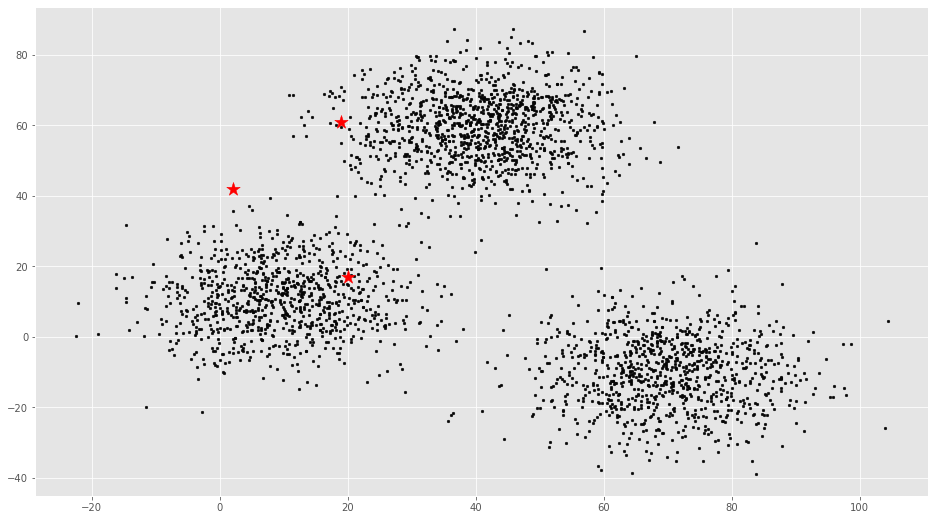

In [9]:
plt.scatter(f1, 
            f2, 
            c='#050505', 
            s=7)

plt.scatter(C_x, 
            C_y, 
            marker='*', 
            s=200, 
            c='r');


In [10]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
clusters


array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
error

80.86408349817613

#### Understanding python's numpy.argmin(a, axis=None, out=None)
- Returns the indices of the minimum values along an axis.
- In case of multiple occurrences of the minimum values, the indices corresponding to the first occurrence are returned.

In [13]:
# example
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [14]:
print(np.argmin(a))
print(np.argmin(a, axis=0))
print(np.argmin(a, axis=1))

0
[0 0 0]
[0 0]


#### Understanding python's deepcopy

- Python defines a module which allows to __deep copy or shallow copy__ mutable object using the inbuilt functions present in the module “copy“.

- Assignment statements in Python do not copy objects, they create bindings between a target and an object. 

- In case of deep copy, a copy of object is copied in other object. It means that any changes made to a copy of object do not reflect in the original object.

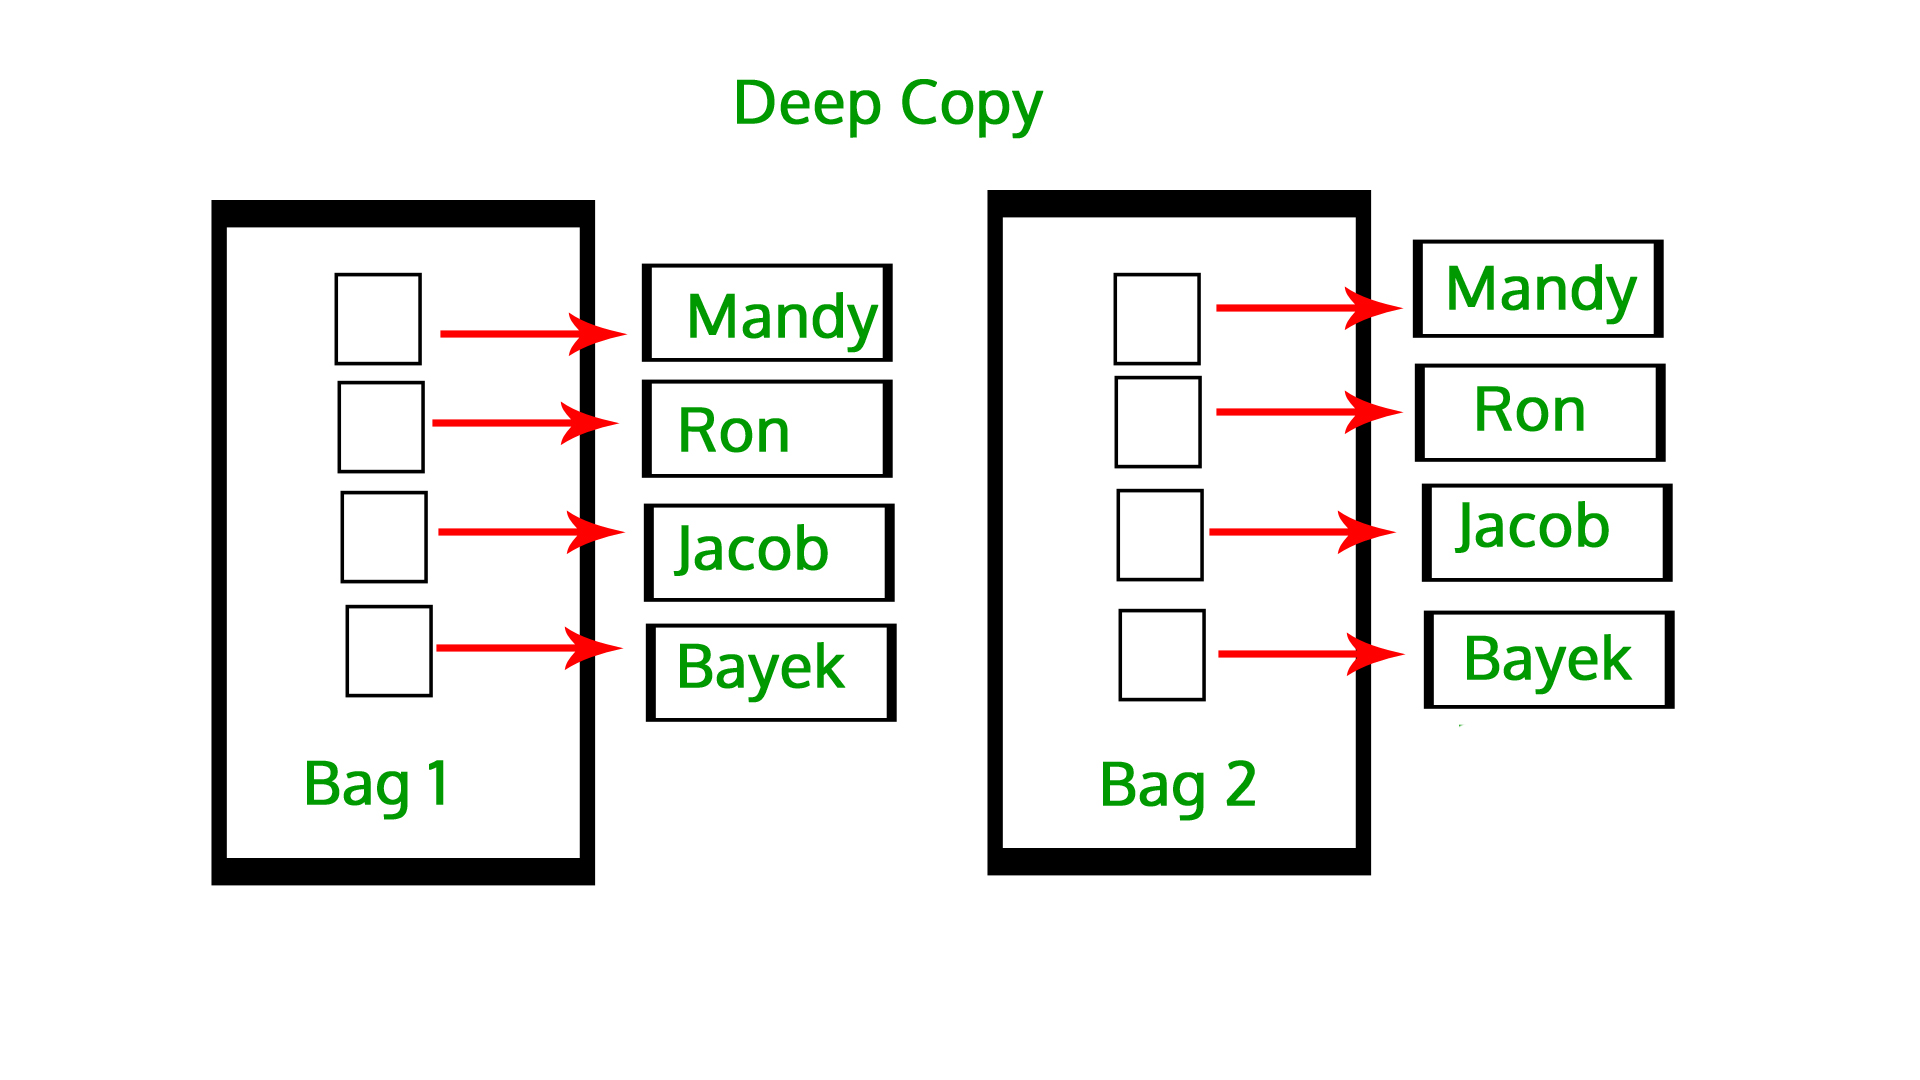

In [15]:
# initializing list 1 
li1 = [1, 2, [3,5], 4] 

In [16]:
# using deepcopy to deep copy  
li2 = deepcopy(li1) 

In [17]:
# original elements of list 
print ("The original elements before deep copying") 
print(li1)
print("\r") 
  
# adding and element to new list 
li2[2][0] = 7
  
# Change is reflected in l2  
print ("The new list of elements after deep copying ") 
print(li2)
print("\r") 
  
# Change is NOT reflected in original list 
# as it is a deep copy 
print ("The original elements after deep copying, remains the same") 
print(li1)

The original elements before deep copying
[1, 2, [3, 5], 4]

The new list of elements after deep copying 
[1, 2, [7, 5], 4]

The original elements after deep copying, remains the same
[1, 2, [3, 5], 4]


#### back to the k means code

In [18]:
from copy import deepcopy
# Loop will run till the error becomes zero
while error != 0:
    
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances   = dist(X[i], C)
        cluster     = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    error = dist(C, C_old, None)

In [19]:
clusters

array([1., 1., 1., ..., 2., 2., 2.])

(1149, 2)
(899, 2)
(952, 2)


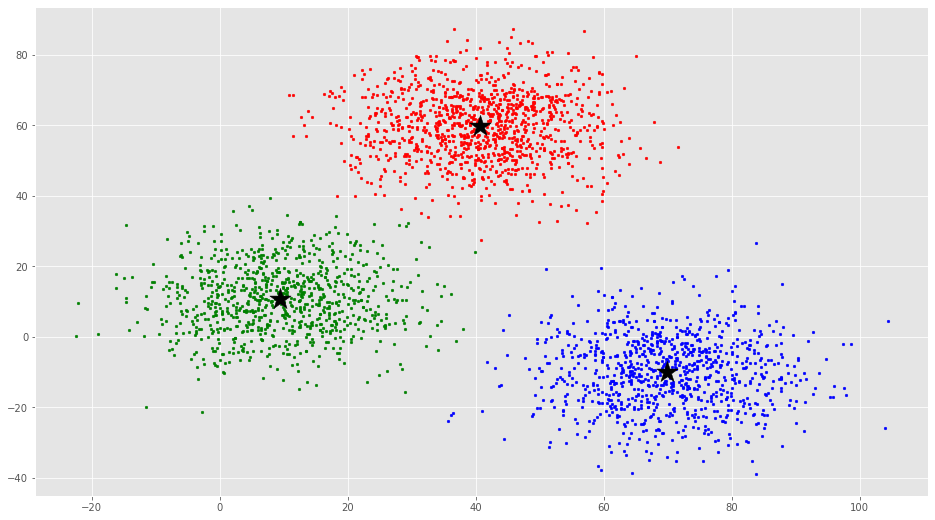

In [20]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        print(points.shape)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        
ax.scatter(C[:, 0], C[:, 1], marker='*', s=500, c='k');

From this visualization it is clear that there are 3 clusters with black stars as their centroid.

#### Using scikit-learn

In [21]:
#### Instantiate the kmeans with required number of clusters
k_clusters = 3
kmeans     = KMeans(n_clusters=k_clusters)
kmeans

KMeans(n_clusters=3)

In [22]:
# Fitting the input data, Getting the cluster labels
y_kmeans = kmeans.fit_predict(X)
np.unique(y_kmeans)

array([0, 1, 2])

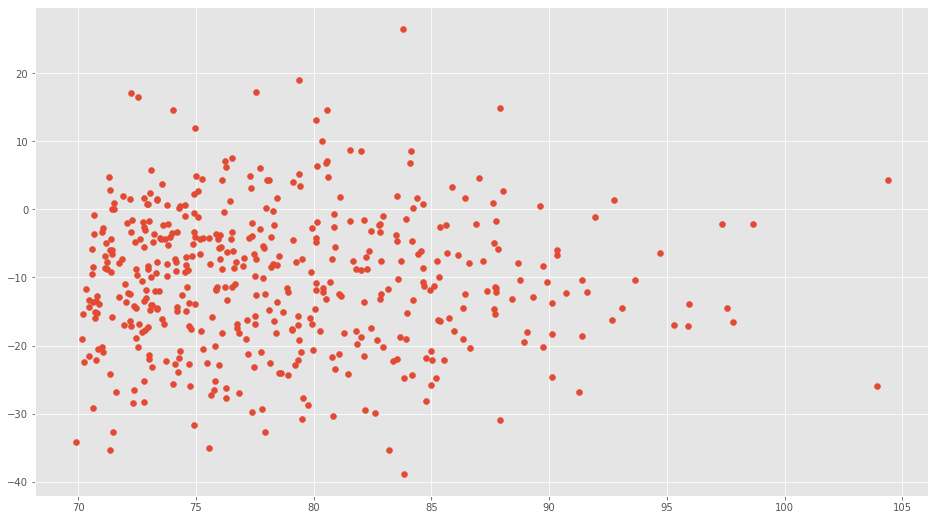

In [39]:
#plt.scatter(X[y_kmeans==0, 0] ,X[y_kmeans==0, 1])

In [23]:
C

array([[ 40.683628,  59.715893],
       [  9.478045,  10.686052],
       [ 69.92419 , -10.119641]], dtype=float32)

In [26]:
# Centroid values
centroids = kmeans.cluster_centers_
centroids

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

In [27]:
l=kmeans.labels_

In [30]:
np.unique(l)

array([0, 1, 2])

In [46]:
# Comparing with scikit-learn centroids
print("Centroid values")
print("Custom code")
print(C) 

print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Custom code
[[13. 80.]
 [83. 33.]
 [11. 73.]]
sklearn
[[ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]]


In [47]:
# Visualising the clusters

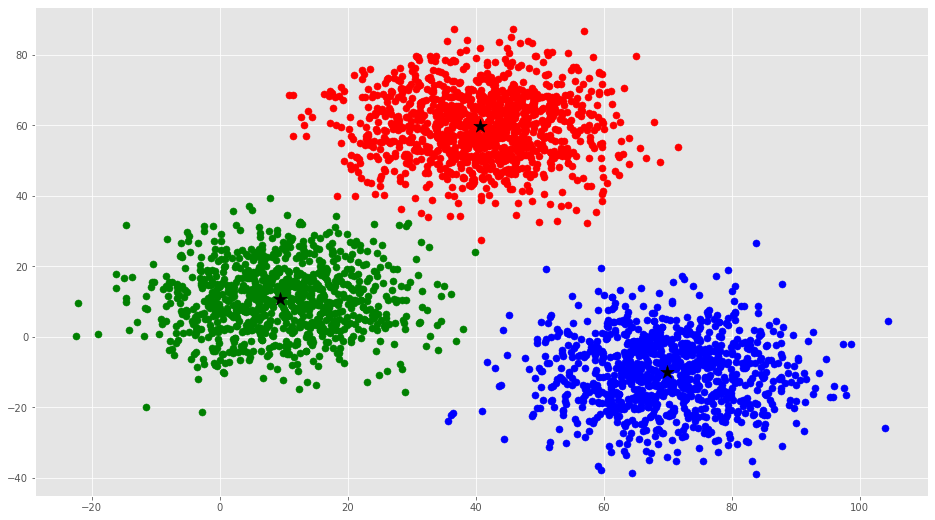

In [48]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

#fig, ax = plt.subplots()

for i in range(k_clusters):
    plt.scatter(X[y_kmeans == i, 0], 
                X[y_kmeans == i, 1], 
                s = 50, 
                c =colors[i], 
                label = 'cluster '+ str(i))

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k');


#### Run K-Means on this with values 2, 3, 4, 5 and 6

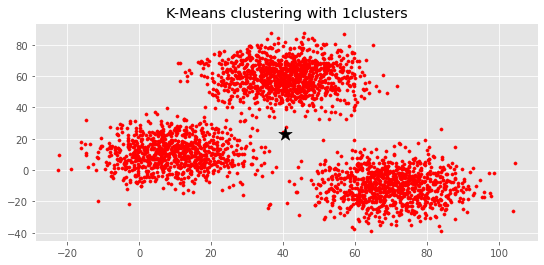

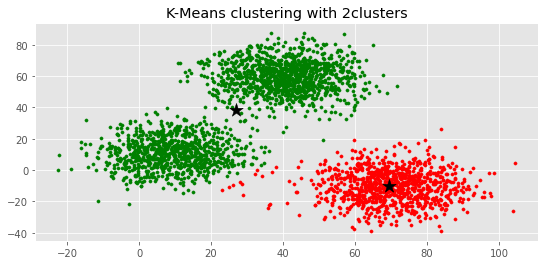

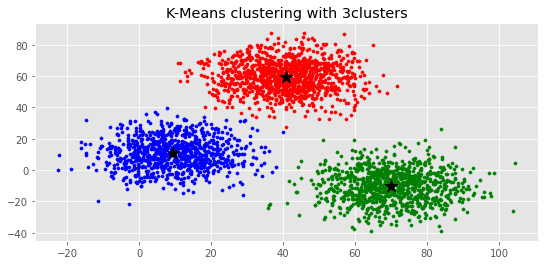

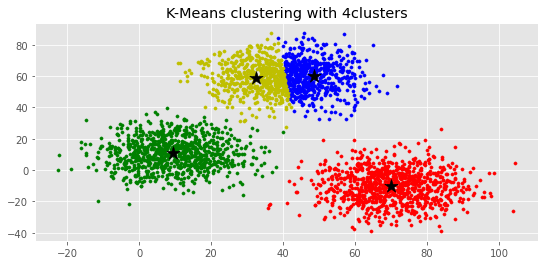

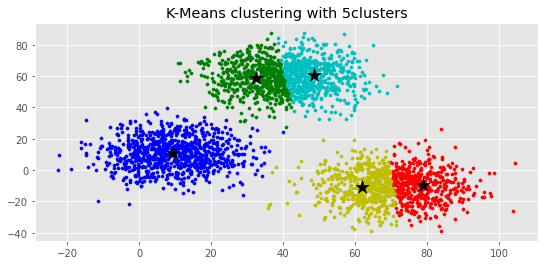

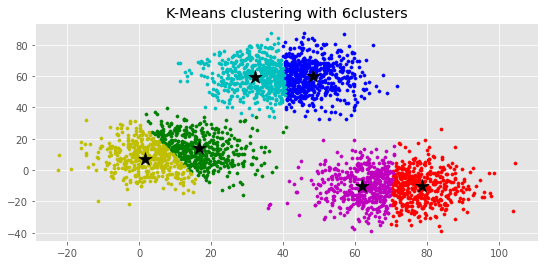

In [31]:
# Instantiate the kmeans with required number of clusters
total_no_unique_clusters = 6

for k_clusters in range(1, total_no_unique_clusters+1):
    fig = plt.figure(figsize=(9, 4)) 
    
    kmeans     = KMeans(n_clusters=k_clusters)

    # Fitting the input data, Getting the cluster labels
    y_kmeans = kmeans.fit_predict(X)

    # Centroid values
    centroids = kmeans.cluster_centers_

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    for i in range(k_clusters):

        plt.title('K-Means clustering with '+ str(i+1)+ 'clusters')
        plt.scatter( X[y_kmeans == i, 0], 
                    X[y_kmeans == i, 1], 
                    s = 10, 
                    c =colors[i], 
                    label = 'cluster '+ str(i))

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k');
